## `fsolve`

A função `fsolve` do submódulo `scipy.optimize` pode ser usada como método geral para busca de raízes de equações não-lineares escalares ou vetoriais. 

Para usar `fsolve` em uma equação escalar, precisamos de, no mínimo:

- uma função que possui pelo menos um argumento
- estimativa inicial para a raiz

Para equações vetoriais (sistemas), precisamos de mais argumentos. Vejamos o exemplo do paraquedista:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve 

t = 12.0
v = 42.0
m = 70.0
g = 9.81

def param(t,v,m,g):    
    return [t,v,m,g]

def fun(c):
    p = param(t,v,m,g)
    return p[3]*p[2]/c*(1 - np.exp(-c/p[2]*p[0])) - p[1]

# estimativa inicial 
c0 = -1000.0

# raiz 
c_raiz = fsolve(fun,c0)

# impressao (estilo Python 2)
print('Minha raiz é %.6f' % c_raiz)

# impressao (estilo Python 3)
print("Minha raiz é {0:.6f}".format(c_raiz[0]))

Minha raiz é 15.127432
Minha raiz é 15.127432


### Como incorporar tudo em uma só função 

In [2]:
def minha_fun(t,v,m,g,c0):
    
    p = [t,v,m,g] 
    f = lambda c: p[3]*p[2]/c*(1 - np.exp(-c/p[2]*p[0])) - p[1]
    c_raiz = fsolve(f,c0)    
    print("---> Minha raiz é {0:.6f}".format(c_raiz[0]))
    return f,c_raiz[0]

In [3]:
fc,c_raiz = minha_fun(t,v,m,g,c0)

---> Minha raiz é 15.127432


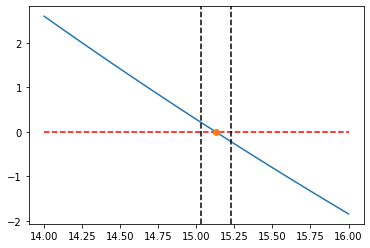

In [4]:
a,b = 14,16
c = np.linspace(a,b,100)

delta = 0.1
plt.plot(c,fc(c),c,0*c,'r--',c_raiz,fc(c_raiz),'o');
plt.axvline(c_raiz - delta,c='k',ls='--');
plt.axvline(c_raiz + delta,c='k',ls='--');